# 0-Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, balanced_accuracy_score
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, QuantileTransformer, PowerTransformer
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.optimizers import Adam
#from keras.backend import expand_dims
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.constraints import MaxNorm
from keras.layers import Activation, Dense, Conv1D, Flatten, MaxPooling1D, Dropout, BatchNormalization, SpatialDropout1D

## Librerias oversampling


In [36]:
from imblearn.over_sampling import SMOTE


In [37]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

# 1- Load Data

In [38]:
s_aureus = pd.read_csv('s_aureus_driams_a_bin3_2000_20000Da.csv')
s_aureus = s_aureus.fillna(0)
s_aureus

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19991,19994,19997,code,species,Oxacillin,Clindamycin,Ceftriaxone,Ciprofloxacin,Fusidic acid
0,951.428571,826.125000,944.857143,898.428571,1007.714286,936.000000,828.571429,812.000000,782.714286,741.625000,...,35.5,20.500000,27.342857,029f0abf-1664-424f-88cb-11c9c8af2b11,Staphylococcus aureus,0.0,0.0,0.0,0.0,1.0
1,784.714286,701.125000,681.571429,762.142857,737.571429,733.000000,735.857143,659.571429,802.714286,554.375000,...,30.0,40.500000,34.695238,08149af1-10f5-4f02-81d8-3d46d66d4a7a,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
2,50.875000,89.142857,56.142857,151.285714,132.714286,110.428571,47.285714,63.428571,100.375000,52.142857,...,2.5,30.500000,11.288462,08fe3876-ecee-4ddc-9aa9-a84f605757f7,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3,843.285714,816.500000,734.428571,1027.142857,979.428571,875.571429,912.142857,714.428571,945.428571,886.500000,...,15.5,8.000000,20.057143,0a9fdd4b-7180-47c0-849e-cb32d46da94c,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
4,307.857143,295.000000,246.714286,181.571429,258.000000,318.714286,295.714286,300.857143,278.142857,256.125000,...,25.5,32.000000,24.990476,0d82f4c4-473c-49d8-8c85-e3e36e96d047,Staphylococcus aureus,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3786,288.000000,330.285714,296.142857,265.142857,310.750000,287.000000,345.000000,260.000000,198.714286,257.285714,...,0.0,0.000000,0.004038,fe72a46e-021e-4f0c-b81e-c4c4507e5aa8_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3787,1286.142857,989.714286,938.285714,901.428571,872.000000,1001.000000,1061.571429,890.857143,813.857143,961.000000,...,0.0,0.000000,0.053908,fe73e705-161f-49a7-b021-7e78d074129b_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3788,986.857143,977.285714,892.285714,986.714286,1045.875000,986.857143,963.571429,968.571429,960.857143,969.714286,...,0.0,0.000000,0.039084,feb54c45-54f7-4758-8408-2e94ab6c53e1_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0
3789,141.857143,197.428571,148.142857,114.000000,125.857143,158.750000,176.571429,148.285714,149.714286,151.714286,...,0.0,0.000000,0.012113,fef2ea82-be15-4e10-8685-77c42068455c_MALDI2,Staphylococcus aureus,0.0,0.0,0.0,0.0,0.0


# Preprocessing Data

In [39]:
s_aureus_oxacillin = s_aureus.drop(columns=['code','species', 'Clindamycin', 'Ceftriaxone', 'Ciprofloxacin', 'Fusidic acid'])
s_aureus_oxacillin.dropna(axis=0, how="any", inplace=True)

In [40]:
s_aureus_ceftriaxone = s_aureus.drop(columns=['Oxacillin', 'Clindamycin', 'Ceftriaxone', 'Fusidic acid'])
#ceftriaxone.dropna(axis=0, how="any", inplace=True)
s_aureus_ceftriaxone.dropna(axis=0, how="any", inplace=True)
s_aureus_ceftriaxone.shape

(3791, 6003)

In [41]:
s_aureus_oxacillin.head()

,2000,2003,2006,2009,2012,2015,2018,2021,2024,2027,...,19973,19976,19979,19982,19985,19988,19991,19994,19997,Oxacillin
0,951.428571,826.125000,944.857143,898.428571,1007.714286,936.000000,828.571429,812.000000,782.714286,741.625000,...,14.333333,24.0,68.0,19.0,19.000000,50.0,35.5,20.5,27.342857,0.0
1,784.714286,701.125000,681.571429,762.142857,737.571429,733.000000,735.857143,659.571429,802.714286,554.375000,...,15.666667,39.0,19.5,42.0,69.666667,31.0,30.0,40.5,34.695238,0.0
2,50.875000,89.142857,56.142857,151.285714,132.714286,110.428571,47.285714,63.428571,100.375000,52.142857,...,20.666667,17.0,2.0,18.0,18.000000,11.5,2.5,30.5,11.288462,0.0
3,843.285714,816.500000,734.428571,1027.142857,979.428571,875.571429,912.142857,714.428571,945.428571,886.500000,...,22.333333,33.0,29.0,14.5,21.666667,24.5,15.5,8.0,20.057143,0.0
4,307.857143,295.000000,246.714286,181.571429,258.000000,318.714286,295.714286,300.857143,278.142857,256.125000,...,26.666667,25.5,18.0,53.5,23.000000,24.5,25.5,32.0,24.990476,1.0


In [42]:
X = s_aureus_oxacillin.iloc[:, 0:6000].values  # variables independientes (espectros de masa)
y = s_aureus_oxacillin.iloc[:, 6000].values    # variable dependientes (resistencia a ciprofloxacin)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [43]:
len(X)

3791

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)


In [45]:
len(X_train)

3032

In [46]:
X_train

array([[ 332.42856  ,  265.125    ,  230.28572  , ...,   29.5      ,
          30.5      ,   22.847618 ],
       [ 122.85714  ,  127.42857  ,  121.       , ...,    2.       ,
           2.5      ,    1.7047619],
       [ 453.42856  ,  326.5      ,  372.42856  , ...,    8.       ,
          29.666666 ,   21.615385 ],
       ...,
       [ 893.       , 1083.5714   ,  983.8571   , ...,   11.666667 ,
          16.5      ,   11.153846 ],
       [1195.4286   , 1042.5      , 1133.5714   , ...,   15.5      ,
          34.       ,   24.019047 ],
       [ 803.25     ,  780.7143   ,  844.2857   , ...,   31.       ,
          29.5      ,   50.596153 ]], dtype=float32)

## normalizar datos 

In [ ]:
# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el scaler solo con X_train y transformar X_train
X_train_normalizado = scaler.fit_transform(X_train)

# Usar los parámetros calculados en X_train para transformar X_test
X_test_normalizado = scaler.transform(X_test)

## AQUI

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [14]:
from sklearn.decomposition import PCA
# Reducir dimensiones con PCA
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)



In [15]:
from sklearn.decomposition import PCA
# Reducir dimensiones con PCA
pca = PCA(n_components=2)
X_train_pca_2d = pca.fit_transform(X_train)

In [16]:
len(X_train_pca)

3032

In [17]:
len(y_train)

3032

In [18]:
# Graficar los datos reducidos
plt.figure(figsize=(30, 10))
#plt.plot(X_train_pca[:, 1],X_train_pca[:, 0],  c='blue', alpha=0.7, label='Datos PCA')

scatter = plt.scatter(X_train_pca[:, 1],X_train_pca[:, 0],  c=y_train, cmap='Paired', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1], label='Clase (0: No resistencia, 1: Resistencia)')

plt.title('Visualización PCA de X_train')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
# Establecer límites para hacer zoom
rangoX = 200000
rangoY = 500000
plt.xlim(-rangoX, rangoX)  # Cambia los valores para enfocar
plt.ylim(-rangoY, rangoY)    # Cambia los valores para enfocar
plt.grid(True)

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 3000x1000 with 0 Axes>

## Aplicacion de SMOTE

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [20]:
X_resampled_pca = pca.transform(X_resampled)


In [21]:
len(X_resampled_pca)

4902

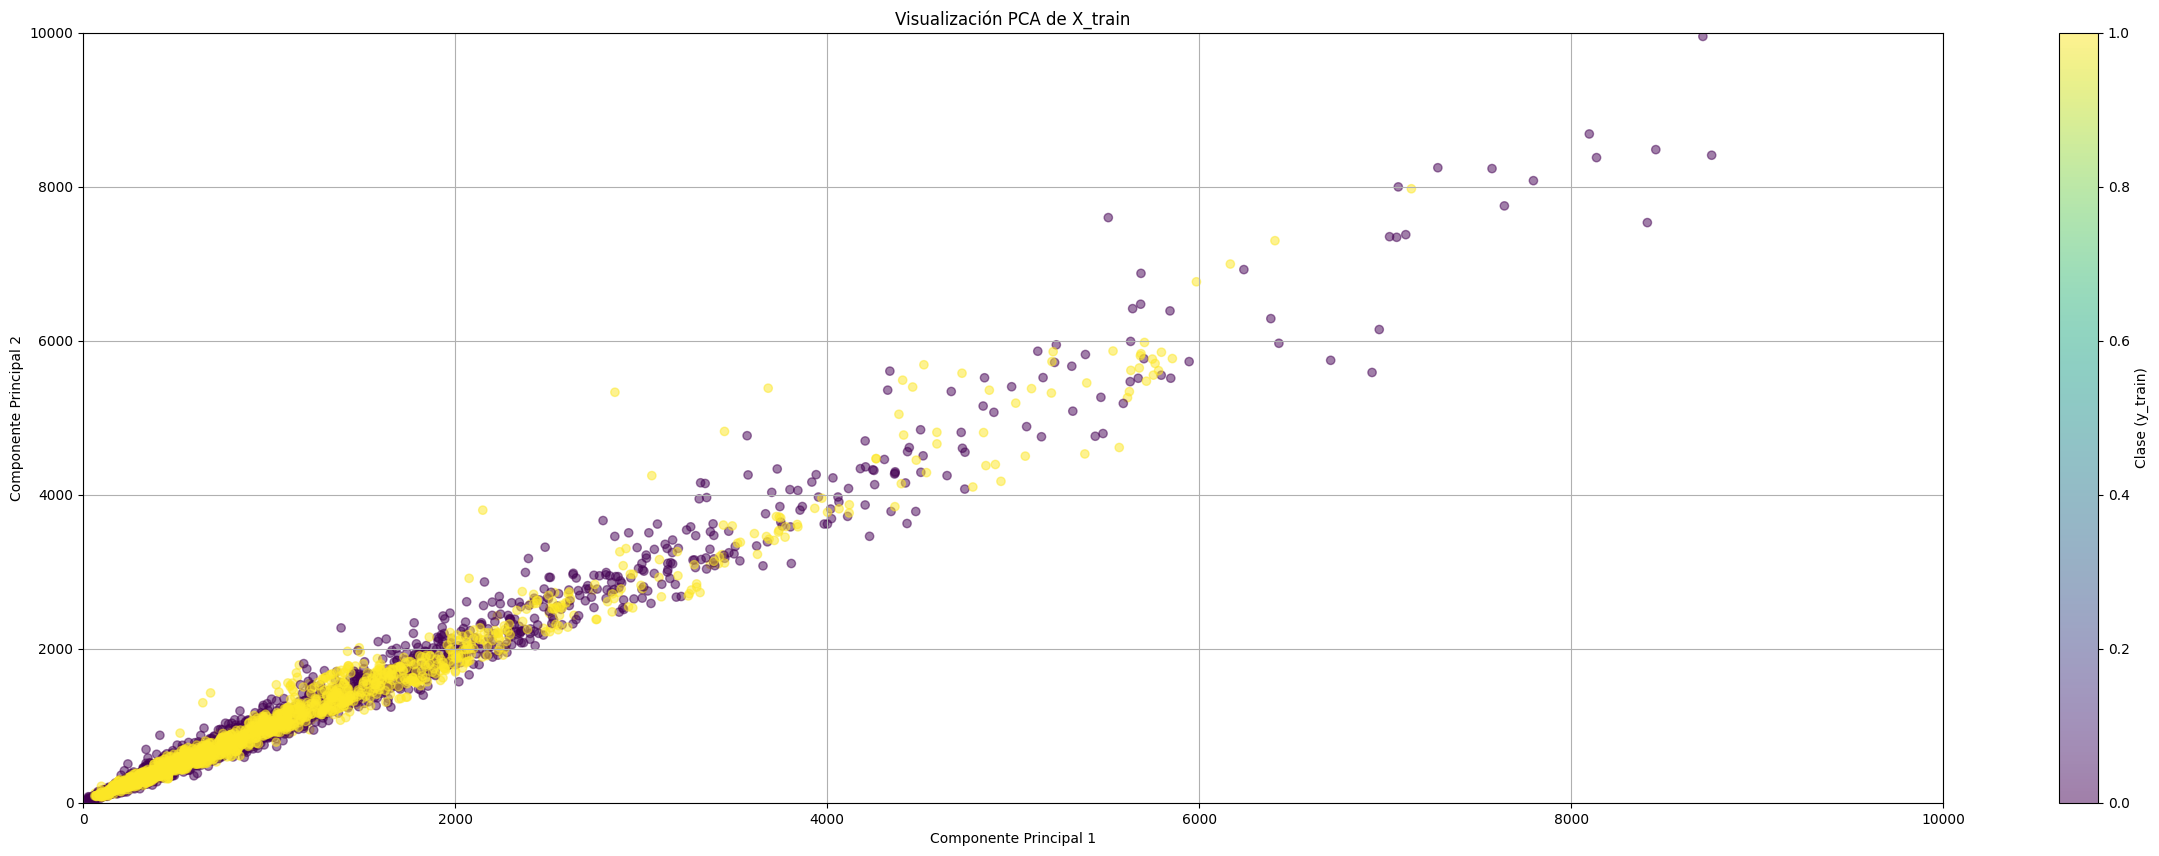

In [22]:
# Graficar los datos reducidos
plt.figure(figsize=(30, 10))
#plt.plot(X_train_pca[:, 1],X_train_pca[:, 0],  c='blue', alpha=0.7, label='Datos PCA')

scatter = plt.scatter(X_resampled[:, 1],X_resampled[:, 0], c=y_resampled, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Clase (y_train)')
plt.title('Visualización PCA de X_train')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
# Establecer límites para hacer zoom
rangoX = 10000
rangoY = 1000
plt.xlim(0, rangoX)  # Cambia los valores para enfocar
plt.ylim(0, rangoX)    # Cambia los valores para enfocar
plt.grid(True)

## prueba


/tmp/ipykernel_165194/1119199761.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_pca[y_train == 0, 0], shade=True, label='Clase 0', color='blue', alpha=0.6)
/tmp/ipykernel_165194/1119199761.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_pca[y_train == 1, 0], shade=True, label='Clase 1', color='red', alpha=0.6)


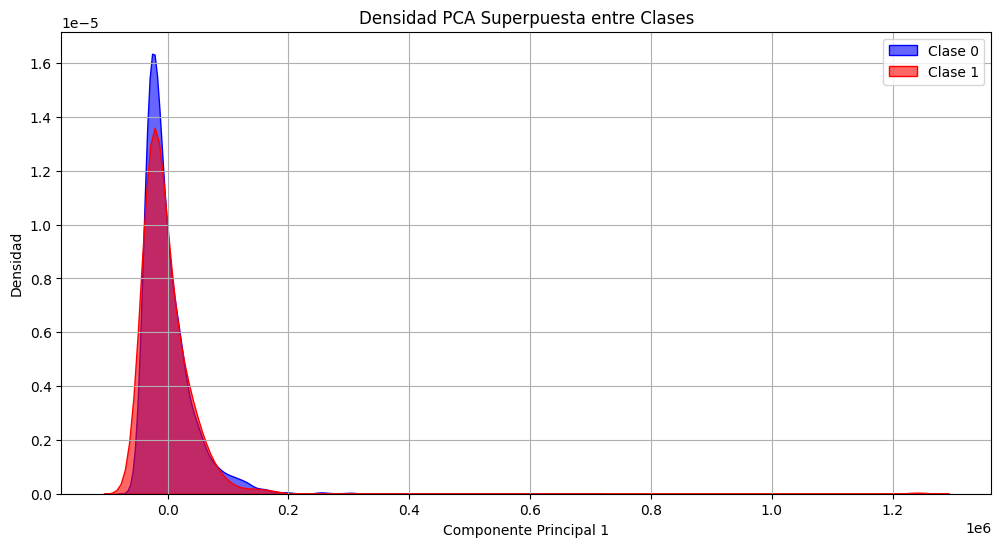

In [23]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(X_train_pca[y_train == 0, 0], shade=True, label='Clase 0', color='blue', alpha=0.6)
sns.kdeplot(X_train_pca[y_train == 1, 0], shade=True, label='Clase 1', color='red', alpha=0.6)
plt.title('Densidad PCA Superpuesta entre Clases')
plt.xlabel('Componente Principal 1')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()


este seria el set de la clase la clase minoritaria

In [24]:
len(X_train_pca[y_train == 1, 0])

581

/tmp/ipykernel_165194/922475589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train, y=X_train_pca[:, 0], palette="pastel")


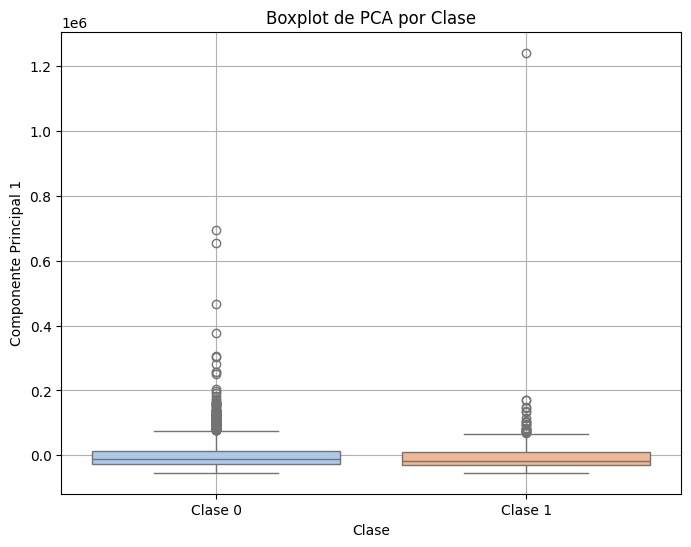

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train, y=X_train_pca[:, 0], palette="pastel")
plt.xticks([0, 1], labels=['Clase 0', 'Clase 1'])
plt.title('Boxplot de PCA por Clase')
plt.xlabel('Clase')
plt.ylabel('Componente Principal 1')
plt.grid(True)
plt.show()


In [26]:
print(pd.Series(y_train).value_counts())

0.0    2451
1.0     581
Name: count, dtype: int64


In [27]:
print(pd.Series(y_resampled).value_counts())


1.0    2451
0.0    2451
Name: count, dtype: int64


In [28]:
scaler=Normalizer(norm='max')
sc_X = scaler
X_train = sc_X.fit_transform(X_resampled)
X_test = sc_X.transform(X_test)

In [29]:
pd.Series(y_resampled).value_counts()

1.0    2451
0.0    2451
Name: count, dtype: int64

In [30]:
sample_size = X_resampled.shape[0] # numero de muestras en el set de datos
time_steps  = X_resampled.shape[1] # numero de atributos en el set de datos
input_dimension = 1            #

X_train_reshaped = X_resampled.reshape(sample_size,time_steps,input_dimension)
X_test_reshaped = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001)
early_st = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

n_timesteps = X_train_reshaped.shape[1] #
n_features  = X_train_reshaped.shape[2] #

# Create and fit DeepAMR model

In [32]:
model = Sequential(name="Modelo_s_aureus_ciprofloxacin")
init_mode = 'normal'
model.add(Conv1D(filters=(64), kernel_size=(17), input_shape = (n_timesteps,n_features), name='Conv_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_1"))

model.add(Conv1D(filters=(128), kernel_size=(9),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name='Conv_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_2"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode,kernel_regularizer=regularizers.l2(0.0001),   name='Conv_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_3"))

model.add(Conv1D(filters=(256), kernel_size=(5),kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),   name='Conv_4'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2, name="MaxPooling1D_4"))

model.add(Flatten())
model.add(Dropout(0.65))
model.add(Dense(256, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_0"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001), name="fully_connected_1"))
model.add(Dense(64, activation='relu',kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001),  name="fully_connected_2"))
model.add(Dense(n_features, activation='sigmoid', name="OUT_Layer"))

model.compile(optimizer = Adam(learning_rate=0.0001), loss = 'binary_crossentropy',  metrics=METRICS)
model.summary()

/home/hpinto/.local/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Modelo_s_aureus_ciprofloxacin"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv1D)                 │ (None, 5984, 64)       │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5984, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 5984, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_1 (MaxPooling1D)   │ (None, 2992, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv1D)                 │ (None, 2984, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2984, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 2984, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_2 (MaxPooling1D)   │ (None, 1492, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv1D)                 │ (None, 1488, 256)      │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1488, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1488, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_3 (MaxPooling1D)   │ (None, 744, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_4 (Conv1D)                 │ (None, 740, 256)       │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 740, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 740, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling1D_4 (MaxPooling1D)   │ (None, 370, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 94720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 94720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_0 (Dense)       │ (None, 256)            │    24,248,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_1 (Dense)       │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_2 (Dense)       │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUT_Layer (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,839,105 (94.75 MB)

 Trainable params: 24,837,697 (94.75 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [35]:
history = model.fit(X_train_reshaped, y_resampled, epochs=1, batch_size=10, verbose=1, validation_split=0.1, callbacks=[reduce_lr,early_st])

I0000 00:00:1734283637.379178  162195 service.cc:148] XLA service 0x7ff184019d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734283637.379234  162195 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A4000, Compute Capability 8.6
2024-12-15 14:27:17.903919: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
E0000 00:00:1734283639.267650  162195 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled with: 9.3.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
E0000 00:00:1734283639.551887  162195 cuda_dnn.cc:522] Loaded runtime CuDNN library: 9.1.0 but source was compiled

FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/usr/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/hpinto/.local/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/hpinto/.local/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/usr/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/hpinto/.local/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/hpinto/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_162049/1534558014.py", line 1, in <module>

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 368, in fit

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/hpinto/.local/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_7496]

# Evaluate the model

In [ ]:
y_pred  = model.predict(X_test_reshaped)
y_pred = (y_pred>0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
[[614   0]
 [145   0]]


In [ ]:
print("balanced acuracy:", balanced_accuracy_score(y_test, y_pred))

balanced acuracy: 0.5


In [ ]:
target_names=["0","1"]
print(classification_report(y_test, y_pred, target_names=target_names))

train_predictions_baseline = model.predict(X_train_reshaped, batch_size=10)
test_predictions_baseline = model.predict(X_test_reshaped, batch_size=10)

baseline_results = model.evaluate(X_test_reshaped, y_test, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       614
           1       0.00      0.00      0.00       145

    accuracy                           0.81       759
   macro avg       0.40      0.50      0.45       759
weighted avg       0.65      0.81      0.72       759



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
loss :  1.0671391487121582
compile_metrics :  0.0



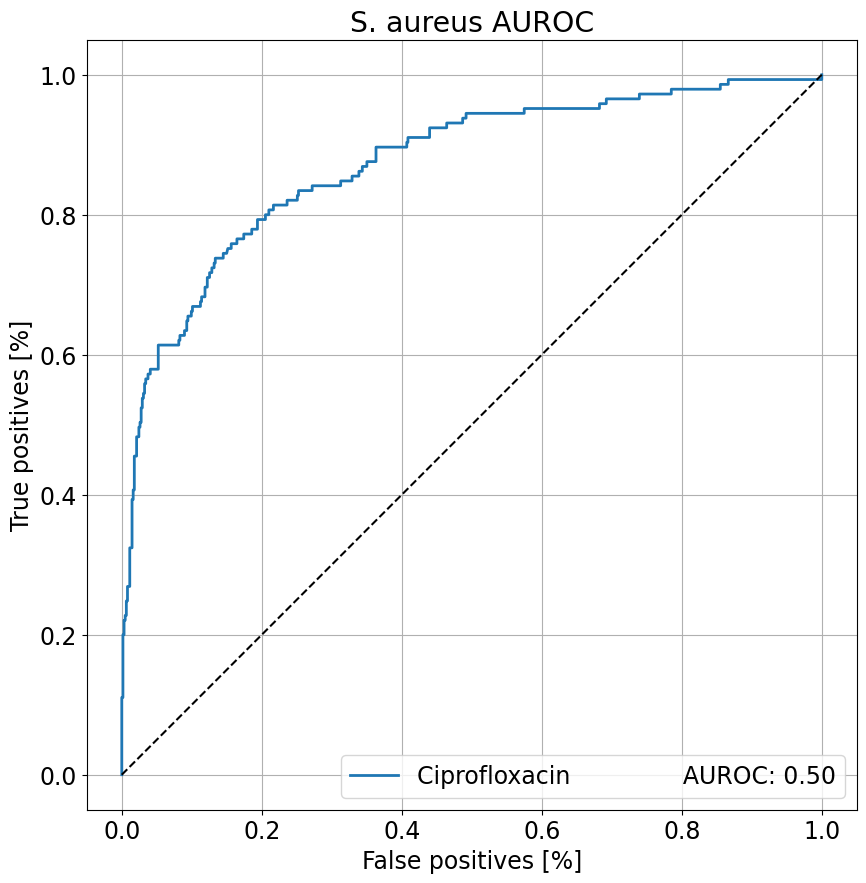

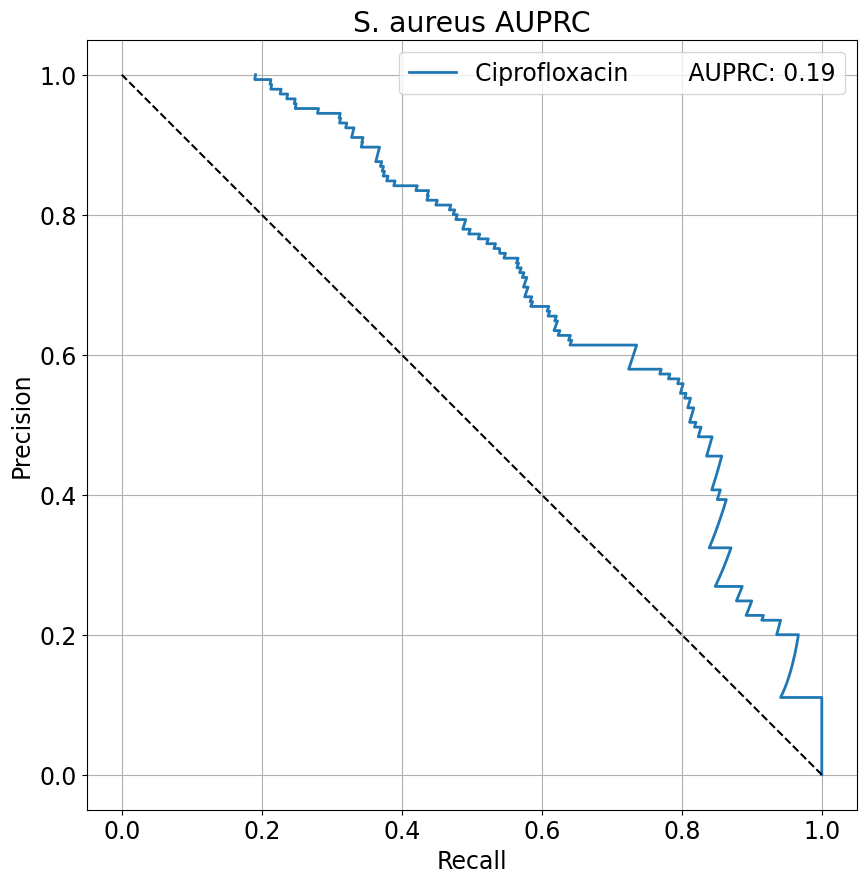

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams.update({'font.size': 17})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.title('E. coli CNN')
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.title('S. aureus AUROC')

  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')
plot_roc("Ciprofloxacin               AUROC: %0.2f" % baseline_results[8], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='lower right')
plt.savefig('s_aureus_auroc.png', bbox_inches='tight')
plt.show()

def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.title('S. aureus AUPRC')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.plot([1, 0], [0, 1], 'k--')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

plot_prc("Ciprofloxacin        AUPRC: %0.2f" % baseline_results[9], y_test, test_predictions_baseline, color=colors[0])

plt.legend(loc='upper right')
plt.savefig('s_aureus_auprc.png', bbox_inches='tight')
plt.show()